## Final Project Submission

Please fill out:
* Student name: Lucas Fishbein
* Student pace: Flex Program
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


In [1]:
#Importing necessary Python Packages
import pandas as pd
import gzip #Allows access to .gz files
import zipfile #Allows access to .zip file
import sqlite3 #Allows access to IMDB SQLite database
import matplotlib.pyplot as plt #Creates Data visualizations
import seaborn as sns #Creates Data visualizations

In [2]:
#Accessing the data files in the zippedData folder for futher use
bom_movie_gross_db = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip') 
rt_movie_info_db = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
rt_reviews_db = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding = 'unicode_escape') 
tmdb_movies_db =pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
tn_movie_budgets_db = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')


# Calculating the Return on Investment (ROI) 

This will be based on worldwide gross income and production cost being sourced from the tn_movie_budgets_db

### General forumla to calculate ROI:

$$
ROI = \frac{\text{Net Income}}{\text{Cost of Invetment}} * 100
$$

### Formula to calculate a Movie's ROI:
$$
ROI = \frac{\text{Worldwide Gross Income}}{\text{Production Budget}} * 100
$$



### Calculating ROI, Creating an ROI column and formating the new ROI column into integer format

In [3]:
#Converting Production Budget and Worldwide gross income figures from object to float data type for calculation
tn_movie_budgets_db[tn_movie_budgets_db.columns[3:]] = tn_movie_budgets_db[tn_movie_budgets_db.columns[3:]].replace('[\$,]', '', regex=True).astype(float)


#Creating ROI column based off the formula to calculate a Movie's ROI stated above and formating as int for sorting purposes
tn_movie_budgets_db['ROI(%)'] = ((tn_movie_budgets_db['worldwide_gross'] / tn_movie_budgets_db['production_budget'])*100).astype(int) 


### Finding the top 500 Movies based on ROI and putting them into a new dataframe called top_500_movies

In [4]:
#Sorting the tn_movie_budgets_db in order to place top 100 performing movies at top of dataframe 
tn_movie_budgets_db = tn_movie_budgets_db.sort_values(by ='ROI(%)', ascending=False) 

#Creating a new datadframe containing only the top 100 most successful movies
top_500_movies = tn_movie_budgets_db.head(500)


### Adding a Release Month Column to Top 500 Movies dataframe 
The release_date column is formatted so that the month of the year is represented by its 3 character name and we will extract this three character name to extract the month of the movie's release

In [5]:
#Takes the first three characters of the release_date string and places it in the 
top_500_movies['release_month'] = [x[:3] for x in top_500_movies['release_date']]

top_500_movies

<ipython-input-5-f1dfed9ca13d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_500_movies['release_month'] = [x[:3] for x in top_500_movies['release_date']]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI(%),release_month
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,180000,Jun
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,49875,Mar
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,43151,Sep
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,41656,Jul
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,41383,Jul
...,...,...,...,...,...,...,...,...
4085,86,"Jul 12, 1991",Boyz n the Hood,6500000.0,56190094.0,56215095.0,864,Jul
2406,7,"Nov 11, 1994",The Santa Clause,22000000.0,144833357.0,189800000.0,862,Nov
3890,91,"Jun 27, 2014",Begin Again,8000000.0,16170632.0,68838736.0,860,Jun
842,43,"Dec 22, 2004",Meet the Fockers,60000000.0,279167575.0,516567575.0,860,Dec


### Creating Bar Graph to show the month of release used the most for top 500 Movies of all time
In order to determine which month Microsoft should release its new movies we will look for release month trends within the top 500 movies of all time

<AxesSubplot:title={'center':'Top 500 Most Successful Movies of All Time sorted by Release Month '}, xlabel='Number of Top Movies', ylabel='Month of Original Release'>

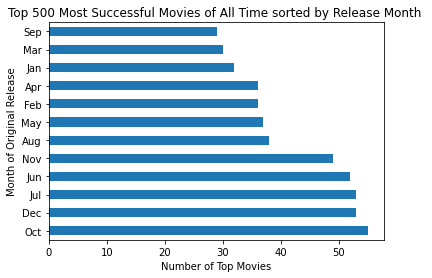

In [6]:
#Creat horizontal bar graph based on number occurences of each month
months_bar = top_500_movies.release_month.value_counts().plot(kind='barh')

#Setting Labels for Graph
months_bar.set_xlabel('Number of Top Movies')
months_bar.set_ylabel('Month of Original Release')
months_bar.set_title('Top 500 Most Successful Movies of All Time sorted by Release Month ')
months_bar

### Creating a Scatter Plot to represent how Production Budget and Worldwide Gross income are related 

'This shows that inputting more money makes more money but I do not like that as an outcome'

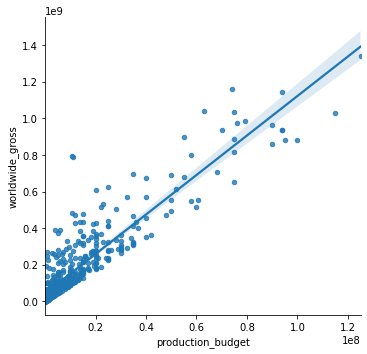

In [7]:
top_500_movies = top_500_movies.sort_values('production_budget', ascending=False)
top_500_movies_no_pb_outlier = top_500_movies[1:]
pb_ww_graph = sns.lmplot(y ='worldwide_gross',x ='production_budget', data= top_500_movies_no_pb_outlier, fit_reg=True, scatter_kws={"marker": "D", "s": 20})
#pd.DataFrame(production_budget).hist()
pb_ww_graph


'''This shows that inputting more money makes more money but I do not like that as an outcome'''

### Creating a Scatter plot to show the relationship between production budget and ROI

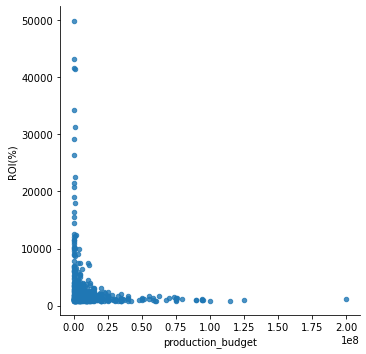

In [8]:
top_500_movies = top_500_movies.sort_values('ROI(%)', ascending=False)
top_500_movies_no_roi_outlier = top_500_movies[1:]

pb_roi_graph = sns.lmplot(y ='ROI(%)',x ='production_budget', data= top_500_movies_no_roi_outlier, fit_reg=False, scatter_kws={"marker": "D", "s": 20})

pb_roi_graph

### Separating the entire Movie Budgets data set into bins by prodution budget to determine which production value ranges most often create higher ROIs

In [9]:
import numpy as np
#Sort entire Movie budgets database by production budget
tn_movie_budgets_db = tn_movie_budgets_db.sort_values('production_budget')
#determining bin size to establish production budget ranges
bins = np.arange(0,400000000,1000000)

ind = np.digitize(tn_movie_budgets_db['production_budget', bins])
#production_budget = tn_movie_budgets_db['production_budget']

print(tn_movie_budgets_db.groupby(ind))


TypeError: '('production_budget', array([        0,   1000000,   2000000,   3000000,   4000000,   5000000,
         6000000,   7000000,   8000000,   9000000,  10000000,  11000000,
        12000000,  13000000,  14000000,  15000000,  16000000,  17000000,
        18000000,  19000000,  20000000,  21000000,  22000000,  23000000,
        24000000,  25000000,  26000000,  27000000,  28000000,  29000000,
        30000000,  31000000,  32000000,  33000000,  34000000,  35000000,
        36000000,  37000000,  38000000,  39000000,  40000000,  41000000,
        42000000,  43000000,  44000000,  45000000,  46000000,  47000000,
        48000000,  49000000,  50000000,  51000000,  52000000,  53000000,
        54000000,  55000000,  56000000,  57000000,  58000000,  59000000,
        60000000,  61000000,  62000000,  63000000,  64000000,  65000000,
        66000000,  67000000,  68000000,  69000000,  70000000,  71000000,
        72000000,  73000000,  74000000,  75000000,  76000000,  77000000,
        78000000,  79000000,  80000000,  81000000,  82000000,  83000000,
        84000000,  85000000,  86000000,  87000000,  88000000,  89000000,
        90000000,  91000000,  92000000,  93000000,  94000000,  95000000,
        96000000,  97000000,  98000000,  99000000, 100000000, 101000000,
       102000000, 103000000, 104000000, 105000000, 106000000, 107000000,
       108000000, 109000000, 110000000, 111000000, 112000000, 113000000,
       114000000, 115000000, 116000000, 117000000, 118000000, 119000000,
       120000000, 121000000, 122000000, 123000000, 124000000, 125000000,
       126000000, 127000000, 128000000, 129000000, 130000000, 131000000,
       132000000, 133000000, 134000000, 135000000, 136000000, 137000000,
       138000000, 139000000, 140000000, 141000000, 142000000, 143000000,
       144000000, 145000000, 146000000, 147000000, 148000000, 149000000,
       150000000, 151000000, 152000000, 153000000, 154000000, 155000000,
       156000000, 157000000, 158000000, 159000000, 160000000, 161000000,
       162000000, 163000000, 164000000, 165000000, 166000000, 167000000,
       168000000, 169000000, 170000000, 171000000, 172000000, 173000000,
       174000000, 175000000, 176000000, 177000000, 178000000, 179000000,
       180000000, 181000000, 182000000, 183000000, 184000000, 185000000,
       186000000, 187000000, 188000000, 189000000, 190000000, 191000000,
       192000000, 193000000, 194000000, 195000000, 196000000, 197000000,
       198000000, 199000000, 200000000, 201000000, 202000000, 203000000,
       204000000, 205000000, 206000000, 207000000, 208000000, 209000000,
       210000000, 211000000, 212000000, 213000000, 214000000, 215000000,
       216000000, 217000000, 218000000, 219000000, 220000000, 221000000,
       222000000, 223000000, 224000000, 225000000, 226000000, 227000000,
       228000000, 229000000, 230000000, 231000000, 232000000, 233000000,
       234000000, 235000000, 236000000, 237000000, 238000000, 239000000,
       240000000, 241000000, 242000000, 243000000, 244000000, 245000000,
       246000000, 247000000, 248000000, 249000000, 250000000, 251000000,
       252000000, 253000000, 254000000, 255000000, 256000000, 257000000,
       258000000, 259000000, 260000000, 261000000, 262000000, 263000000,
       264000000, 265000000, 266000000, 267000000, 268000000, 269000000,
       270000000, 271000000, 272000000, 273000000, 274000000, 275000000,
       276000000, 277000000, 278000000, 279000000, 280000000, 281000000,
       282000000, 283000000, 284000000, 285000000, 286000000, 287000000,
       288000000, 289000000, 290000000, 291000000, 292000000, 293000000,
       294000000, 295000000, 296000000, 297000000, 298000000, 299000000,
       300000000, 301000000, 302000000, 303000000, 304000000, 305000000,
       306000000, 307000000, 308000000, 309000000, 310000000, 311000000,
       312000000, 313000000, 314000000, 315000000, 316000000, 317000000,
       318000000, 319000000, 320000000, 321000000, 322000000, 323000000,
       324000000, 325000000, 326000000, 327000000, 328000000, 329000000,
       330000000, 331000000, 332000000, 333000000, 334000000, 335000000,
       336000000, 337000000, 338000000, 339000000, 340000000, 341000000,
       342000000, 343000000, 344000000, 345000000, 346000000, 347000000,
       348000000, 349000000, 350000000, 351000000, 352000000, 353000000,
       354000000, 355000000, 356000000, 357000000, 358000000, 359000000,
       360000000, 361000000, 362000000, 363000000, 364000000, 365000000,
       366000000, 367000000, 368000000, 369000000, 370000000, 371000000,
       372000000, 373000000, 374000000, 375000000, 376000000, 377000000,
       378000000, 379000000, 380000000, 381000000, 382000000, 383000000,
       384000000, 385000000, 386000000, 387000000, 388000000, 389000000,
       390000000, 391000000, 392000000, 393000000, 394000000, 395000000,
       396000000, 397000000, 398000000, 399000000]))' is an invalid key

In [10]:
tn_movie_budgets_db[tn_movie_budgets_db.production_budget > 1000000]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI(%)
5209,10,"Jan 23, 1943",Casablanca,1039000.0,10462500.0,1.049686e+07,1010
5208,9,"Dec 11, 2009",Rocket Singh: Salesman of the Year,1070000.0,164649.0,5.348767e+06,499
5198,99,"Feb 22, 2002",Sex with Strangers,1100000.0,247740.0,2.477400e+05,22
5199,100,"May 18, 2012",Beyond the Black Rainbow,1100000.0,56491.0,5.649100e+04,5
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,39659.0,8.137100e+04,7
...,...,...,...,...,...,...,...
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,415
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,424
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,42
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,254


### Accessing IMDB SQL file in order to connect the tn_movie_budgets and rt_movie_info databases


In [21]:
#extracting SQL database from zip file and store unarchived version in zippedData folder 
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData/')

#Connecting to the SQL database for inspection    
imdb_sql = sqlite3.connect('zippedData/im.db')

#Creating dataframe outside of sql for movie basics table for investigation
imdb_movie_basics = pd.read_sql('''SELECT * FROM movie_basics;''', imdb_sql)

In [23]:
#Joining tables in IMDB SQL file in order to retrieve names of directors and writers for later merges
q = """
SELECT 
    mb.movie_id,
    mb.primary_title, 
    mb.original_title, 
    mb.start_year, 
    mb.runtime_minutes,
    p.primary_name AS director_name
FROM 
    movie_basics as mb
JOIN 
    directors as d
    ON mb.movie_id = d.movie_id
JOIN 
    persons as p
    ON d.person_id = p.person_id
"""

#creating a dataframe that conatins only the information needed in order to join the rt and tn tables
imdb_joined = pd.read_sql(q, imdb_sql)

### Preparing the rt_movie_info_db and imbd_joined for a merge with the tb_movie_budgets via the imdb_joined dataframe by altering the formats of the columns in the to match across dataframes

In [24]:
#Dropping the 30 NaNs from the runtime column of the rt dataset in order to extract runtime as a number
rt_movie_info_db = rt_movie_info_db.dropna(subset=['runtime'])

#extracting the runtime as an float from the runtime string that includes the word "minutes"
rt_movie_info_db['runtime'] = rt_movie_info_db['runtime'].str.extract('(\d+)').astype(float).astype(str)


#Changing format of start_year column in imdb to obj to match year column in rt db
imdb_joined['start_year'] = imdb_joined['start_year'].astype(str)

#Converting imdb runtime_minutes to integer to match formating of rt db and the into str for the merge
#imdb_joined['runtime_minutes'] = imdb_joined['runtime_minutes'].astype(int)
imdb_joined['runtime_minutes'] = imdb_joined['runtime_minutes'].astype(str)

#Creating a year released column in the rt db in order to use during merge with imdb_tn_merge dataframe
rt_movie_info_db['year'] = rt_movie_info_db['theater_date'].str[-4:]


In [25]:
#Merging the two movie title columns (primary and original) in the imdb_joined dataframe with the movie title comlumn in the tn_movie_budgets db
imdb_tn_merge = pd.merge(imdb_joined, tn_movie_budgets_db, left_on=['primary_title' or 'original_title'], right_on='movie', how='inner')

#Merging in the rt_movie_info_db using year released, runtime and director
imdb_tn_rt_merge_yd = pd.merge(imdb_tn_merge, rt_movie_info_db, left_on=['start_year', 'director_name'], right_on=['year','director'], how='inner')
imdb_tn_rt_merge_yrd = pd.merge(imdb_tn_merge, rt_movie_info_db, left_on=['start_year','runtime_minutes', 'director_name'], right_on=['year','runtime','director'], how='inner')
imdb_tn_rt_merge_yr = pd.merge(imdb_tn_merge, rt_movie_info_db, left_on=['start_year','runtime_minutes'], right_on=['year','runtime'], how='inner')

In [26]:
imdb_tn_rt_merge_yd

,primary_title,original_title,start_year,runtime_minutes,movie_id,director_name,id_x,release_date,movie,production_budget,...,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
0,The Mule,The Mule,2018,116.0,tt7959026,Clint Eastwood,100,"Dec 14, 2018",The Mule,50000000.0,...,Drama,Clint Eastwood,Dorothy Blyskal,"Feb 9, 2018","May 22, 2018",$,"35,003,216",120.0,NaN,2018
1,The Mule,The Mule,2018,116.0,tt7959026,Clint Eastwood,100,"Dec 14, 2018",The Mule,50000000.0,...,Drama,Clint Eastwood,Dorothy Blyskal,"Feb 9, 2018","May 22, 2018",$,"35,003,216",120.0,NaN,2018
2,The 15:17 to Paris,The 15:17 to Paris,2018,94.0,tt6802308,Clint Eastwood,23,"Feb 9, 2018",The 15:17 to Paris,30000000.0,...,Drama,Clint Eastwood,Dorothy Blyskal,"Feb 9, 2018","May 22, 2018",$,"35,003,216",120.0,NaN,2018
3,The 15:17 to Paris,The 15:17 to Paris,2018,94.0,tt6802308,Clint Eastwood,23,"Feb 9, 2018",The 15:17 to Paris,30000000.0,...,Drama,Clint Eastwood,Dorothy Blyskal,"Feb 9, 2018","May 22, 2018",$,"35,003,216",120.0,NaN,2018
4,The 15:17 to Paris,The 15:17 to Paris,2018,94.0,tt6802308,Clint Eastwood,23,"Feb 9, 2018",The 15:17 to Paris,30000000.0,...,Drama,Clint Eastwood,Dorothy Blyskal,"Feb 9, 2018","May 22, 2018",$,"35,003,216",120.0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"Three Billboards Outside Ebbing, Missouri","Three Billboards Outside Ebbing, Missouri",2017,115.0,tt5027774,Martin McDonagh,59,"Nov 10, 2017","Three Billboards Outside Ebbing, Missouri",12000000.0,...,Comedy|Drama,Martin McDonagh,Martin McDonagh,"Dec 1, 2017","Feb 27, 2018",$,"52,000,189",115.0,Fox Searchlight Pictures,2017
184,"Love, Simon","Love, Simon",2018,110.0,tt5164432,Greg Berlanti,57,"Mar 16, 2018","Love, Simon",10000000.0,...,Drama,Greg Berlanti,Isaac Aptaker|Elizabeth Berger,"Mar 16, 2018","Jun 12, 2018",NaN,NaN,109.0,20th Century Fox,2018
185,"Love, Simon","Love, Simon",2018,110.0,tt5164432,Greg Berlanti,57,"Mar 16, 2018","Love, Simon",10000000.0,...,Drama,Greg Berlanti,Isaac Aptaker|Elizabeth Berger,"Mar 16, 2018","Jun 12, 2018",NaN,NaN,109.0,20th Century Fox,2018
186,"Love, Simon","Love, Simon",2018,110.0,tt5164432,Greg Berlanti,57,"Mar 16, 2018","Love, Simon",10000000.0,...,Drama,Greg Berlanti,Isaac Aptaker|Elizabeth Berger,"Mar 16, 2018","Jun 12, 2018",NaN,NaN,109.0,20th Century Fox,2018


In [29]:
imdb_tn_rt_merge_yrd

,primary_title,original_title,start_year,runtime_minutes,movie_id,director_name,id_x,release_date,movie,production_budget,...,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
0,Eat Pray Love,Eat Pray Love,2010,133.0,tt0879870,Ryan Murphy,67,"Aug 13, 2010",Eat Pray Love,60000000.0,...,Drama,Ryan Murphy,Ryan Murphy|Jennifer Salt,"Aug 13, 2010","Nov 23, 2010",$,"80,574,010",133.0,Sony Pictures,2010
1,Eat Pray Love,Eat Pray Love,2010,133.0,tt0879870,Ryan Murphy,67,"Aug 13, 2010",Eat Pray Love,60000000.0,...,Drama,Ryan Murphy,Ryan Murphy|Jennifer Salt,"Aug 13, 2010","Nov 23, 2010",$,"80,574,010",133.0,Sony Pictures,2010
2,Eat Pray Love,Eat Pray Love,2010,133.0,tt0879870,Ryan Murphy,67,"Aug 13, 2010",Eat Pray Love,60000000.0,...,Drama,Ryan Murphy,Ryan Murphy|Jennifer Salt,"Aug 13, 2010","Nov 23, 2010",$,"80,574,010",133.0,Sony Pictures,2010
3,Letters to Juliet,Letters to Juliet,2010,105.0,tt0892318,Gary Winick,89,"May 14, 2010",Letters to Juliet,30000000.0,...,Comedy|Drama|Romance,Gary Winick,Jose Rivera|Tim Sullivan,"May 14, 2010","Sep 14, 2010",$,"53,021,560",105.0,Summit Entertainment,2010
4,Letters to Juliet,Letters to Juliet,2010,105.0,tt0892318,Gary Winick,89,"May 14, 2010",Letters to Juliet,30000000.0,...,Comedy|Drama|Romance,Gary Winick,Jose Rivera|Tim Sullivan,"May 14, 2010","Sep 14, 2010",$,"53,021,560",105.0,Summit Entertainment,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,It Comes at Night,It Comes at Night,2017,91.0,tt4695012,Trey Edward Shults,4,"Jun 9, 2017",It Comes at Night,5000000.0,...,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91.0,A24,2017
90,Early Man,Early Man,2018,89.0,tt4701724,Nick Park,98,"Feb 16, 2018",Early Man,50000000.0,...,Animation|Comedy|Kids and Family,Nick Park,Mark Burton|James Higginson,"Feb 16, 2018","May 22, 2018",NaN,NaN,89.0,Lionsgate,2018
91,Early Man,Early Man,2018,89.0,tt4701724,Nick Park,98,"Feb 16, 2018",Early Man,50000000.0,...,Animation|Comedy|Kids and Family,Nick Park,Mark Burton|James Higginson,"Feb 16, 2018","May 22, 2018",NaN,NaN,89.0,Lionsgate,2018
92,Early Man,Early Man,2018,89.0,tt4701724,Nick Park,98,"Feb 16, 2018",Early Man,50000000.0,...,Animation|Comedy|Kids and Family,Nick Park,Mark Burton|James Higginson,"Feb 16, 2018","May 22, 2018",NaN,NaN,89.0,Lionsgate,2018


In [27]:
imdb_tn_rt_merge_yr

,primary_title,original_title,start_year,runtime_minutes,movie_id,director_name,id_x,release_date,movie,production_budget,...,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
0,Foodfight!,Foodfight!,2012,91.0,tt0249516,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,45000000.0,...,Comedy,Jacob Aaron Estes,Jacob Aaron Estes,"Nov 2, 2012","Apr 30, 2013",$,"63,595",91.0,The Weinstein Company,2012
1,Foodfight!,Foodfight!,2012,91.0,tt0249516,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,45000000.0,...,Comedy,Jacob Aaron Estes,Jacob Aaron Estes,"Nov 2, 2012","Apr 30, 2013",$,"63,595",91.0,The Weinstein Company,2012
2,Foodfight!,Foodfight!,2012,91.0,tt0249516,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,45000000.0,...,Comedy,Jacob Aaron Estes,Jacob Aaron Estes,"Nov 2, 2012","Apr 30, 2013",$,"63,595",91.0,The Weinstein Company,2012
3,Foodfight!,Foodfight!,2012,91.0,tt0249516,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,45000000.0,...,Comedy,Jacob Aaron Estes,Jacob Aaron Estes,"Nov 2, 2012","Apr 30, 2013",$,"63,595",91.0,The Weinstein Company,2012
4,Foodfight!,Foodfight!,2012,91.0,tt0249516,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,45000000.0,...,Comedy,Jacob Aaron Estes,Jacob Aaron Estes,"Nov 2, 2012","Apr 30, 2013",$,"63,595",91.0,The Weinstein Company,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,The Missing,The Missing,2015,86.0,tt6917336,Tao Han,11,"Nov 26, 2003",The Missing,65000000.0,...,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86.0,20th Century Fox,2015
3128,The Forsaken,The Forsaken,2015,86.0,tt5124556,Yolanda Torres,28,"Apr 27, 2001",The Forsaken,5000000.0,...,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86.0,20th Century Fox,2015
3129,The Florida Project,The Florida Project,2017,111.0,tt5649144,Sean Baker,11,"Oct 6, 2017",The Florida Project,2000000.0,...,Documentary,Lucy Walker,NaN,"May 26, 2017","Sep 12, 2017",$,"118,253",111.0,NaN,2017
3130,The Florida Project,The Florida Project,2017,111.0,tt5649144,Sean Baker,11,"Oct 6, 2017",The Florida Project,2000000.0,...,Documentary,Lucy Walker,NaN,"May 26, 2017","Sep 12, 2017",$,"118,253",111.0,NaN,2017


In [28]:
#testing how many duplicates are in the merge of using year and runtime
len(imdb_tn_rt_merge_yr['movie_id'])-len(imdb_tn_rt_merge_yr['movie_id'].drop_duplicates())


2224

In [31]:
tn_movie_budgets_db

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI(%)
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,180000
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,49875
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,43151
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,41656
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,41383
...,...,...,...,...,...,...,...
2853,54,"Feb 19, 2016",Forsaken,18000000.0,0.0,0.0,0
3827,28,"Dec 31, 2004",The I Inside,8800000.0,0.0,0.0,0
3825,26,"Feb 26, 2011",Ultramarines,8900000.0,0.0,0.0,0
1208,9,"Sep 20, 2019",Ad Astra,49800000.0,0.0,0.0,0


In [32]:
rt_movie_info_db

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104.0,NaN,1971
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One,2012
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116.0,NaN,1996
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128.0,NaN,1994
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106.0,New Line Cinema,2006
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88.0,Paramount Vantage,1993
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111.0,NaN,1962
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101.0,NaN,1993
